# Sarcasm Detection
 **Acknowledgement**

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [2]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

  Using cached https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl
Processing /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd/gast-0.2.2-cp36-none-any.whl
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.2
    Uninstalling gast-0.3.2:
      Successfully uninstalled gast-0.3.2


In [1]:
!!pip install gast==0.3.2

['Collecting gast==0.3.2',
 '  Downloading https://files.pythonhosted.org/packages/1f/04/4e36c33f8eb5c5b6c622a1f4859352a6acca7ab387257d4b3c191d23ec1d/gast-0.3.2.tar.gz',
 'Building wheels for collected packages: gast',
 '  Building wheel for gast (setup.py) ... \x1b[?25l\x1b[?25hdone',
 '  Created wheel for gast: filename=gast-0.3.2-cp36-none-any.whl size=9680 sha256=677e84e35ce5c42ad17a766518dc3c07324101f276589fdd7717bdc0c89d08c9',
 '  Stored in directory: /root/.cache/pip/wheels/59/38/c6/234dc39b4f6951a0768fbc02d5b7207137a5b1d9094f0d54bf',
 'Successfully built gast',
 "\x1bERROR: tensorflow 2.0.0 has requirement gast==0.2.2, but you'll have gast 0.3.2 which is incompatible.\x1b",
 'Installing collected packages: gast',
 '  Found existing installation: gast 0.2.2',
 '    Uninstalling gast-0.2.2:',
 '      Successfully uninstalled gast-0.2.2',
 'Successfully installed gast-0.3.2']

## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#Set your project path 
project_path =  ('/content/drive/My Drive/NLP/project')

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data.
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [0]:
import os
os.chdir(project_path)

In [0]:
import pandas as pd
df = pd.read_json("/content/drive/My Drive/NLP/project/Sarcasm_Headlines_Dataset.json", lines=True)

In [7]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
df.shape

(26709, 3)

In [9]:
df.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [0]:
#df['is_sarcastic'] = pd.Categorical(df['is_sarcastic'])
#df.info()

In [11]:
df['headline'][26707]

'israeli ban targeting boycott supporters raises alarm abroad'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

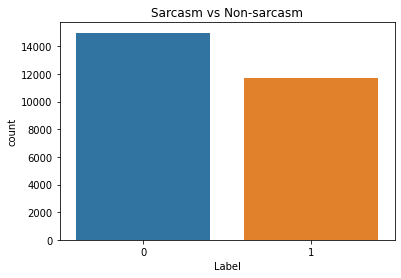

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['is_sarcastic'])
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')

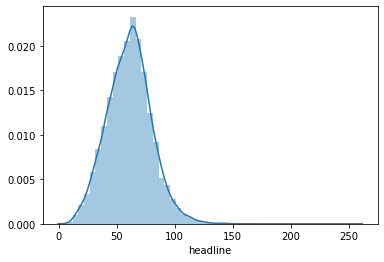

In [13]:
sns.distplot(df.headline.str.len())

A bird view of headline length. Seems the majority has a length 70, 
that's about 5 to 15 words which make sence.

## Drop `article_link` from dataset.
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [0]:
df = df.drop('article_link', axis=1)

In [15]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length.
As different lines are of different length. We need to pad the our sequences using the max length.

In [0]:
import re

df['headline'] = df['headline'].apply(lambda x: x.lower())
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

df['headline_length'] = df['headline'].str.len()

In [17]:
df.head(20)

,headline,is_sarcastic,headline_length
0,former versace store clerk sues over secret bl...,0,76
1,the roseanne revival catches up to our thorny ...,0,81
2,mom starting to fear sons web series closest t...,1,78
3,boehner just wants wife to listen not come up ...,1,82
4,jk rowling wishes snape happy birthday in the ...,0,62
5,advancing the worlds women,0,26
6,the fascinating case for eating labgrown meat,0,45
7,this ceo will send your kids to school if you ...,0,66
8,top snake handler leaves sinking huckabee camp...,1,50
9,fridays morning email inside trumps presser fo...,0,56


In [18]:
df['headline_length'].max()

237

#**## Modelling**

## Import required modules required for modelling.

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model.

In [0]:
max_features = 10000
maxlen = 200
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(df['headline']))

# Define X and y for your model.

In [23]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0  293  795 3551 2

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [0]:
num_words=len(tokenizer.word_index) + 1

#**## Word Embedding**

## Get Glove Word Embeddings

In [0]:
glove_file = project_path + "glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [0]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [26]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile Model
Using Sequential model instance and then adding Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [0]:
#Defining Neural Network
model = Sequential()
#Embedding layer
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
#Bidirectional LSTM
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dropout(0.4))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         5679800   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         336896    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 2)           514       
Total params: 6,017,210
Trainable params: 6,017,210
Non-trainable params: 0
_________________________________________________________________


# Fit the model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

batch_size = 100
epochs = 5

history=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), verbose=1)